# Import Necessary libraries

In [2]:
import pandas as  pd

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [3]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Understanding

### Initial analysis

In [4]:
startup_data.shape

(50, 5)

In [5]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Assumptions check

### Normality Test

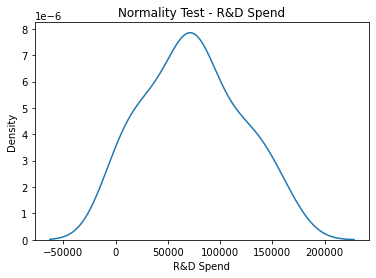

In [8]:
sns.distplot(a=startup_data['R&D Spend'],hist=False)
plt.title('Normality Test - R&D Spend')
plt.show()

In [9]:
startup_data['R&D Spend'].skew()

0.164002172321177

In [10]:
startup_data['R&D Spend'].kurtosis()

-0.7614645568424674

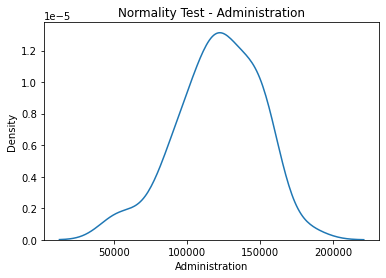

In [11]:
sns.distplot(a=startup_data['Administration'],hist=False)
plt.title('Normality Test - Administration')
plt.show()

In [12]:
startup_data['Administration'].skew()

-0.4890248099671768

In [13]:
startup_data['Administration'].kurtosis()

0.22507113536865386

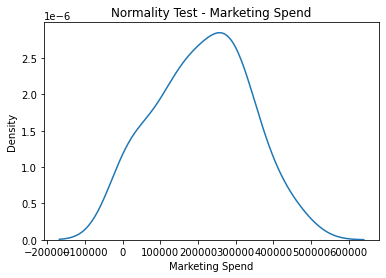

In [14]:
sns.distplot(a=startup_data['Marketing Spend'],hist=False)
plt.title('Normality Test - Marketing Spend')
plt.show()

In [15]:
startup_data['Marketing Spend'].skew()

-0.04647226758360412

In [16]:
startup_data['Marketing Spend'].kurtosis()

-0.6717011281297514

### Normality test using probplot

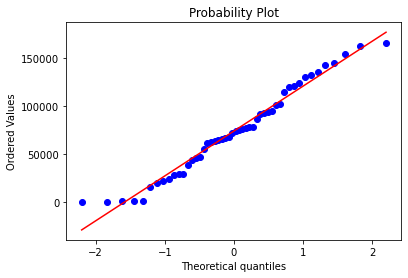

In [17]:
stats.probplot(x=startup_data['R&D Spend'],dist='norm',plot=plt)
plt.show()

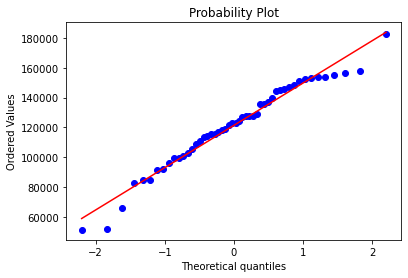

In [18]:
stats.probplot(x=startup_data['Administration'],dist='norm',plot=plt)
plt.show()

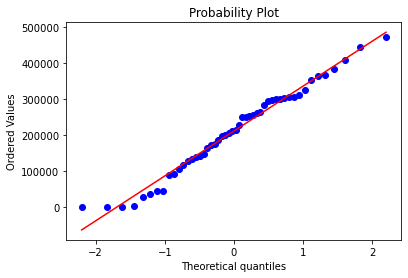

In [19]:
stats.probplot(x=startup_data['Marketing Spend'],dist='norm',plot=plt)
plt.show()

# Linearity Test

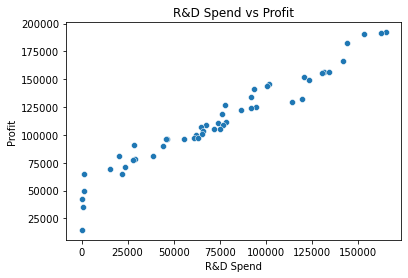

In [20]:
sns.scatterplot(x='R&D Spend',y='Profit',data=startup_data)
plt.title('R&D Spend vs Profit')
plt.show()

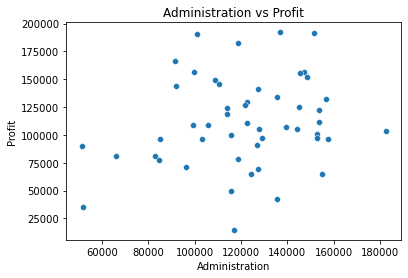

In [21]:
sns.scatterplot(x='Administration',y='Profit',data=startup_data)
plt.title('Administration vs Profit')
plt.show()

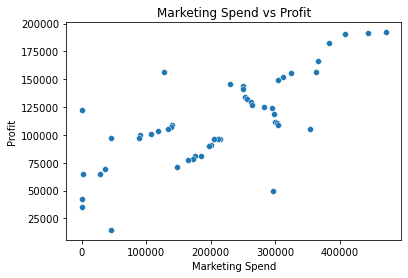

In [22]:
sns.scatterplot(x='Marketing Spend',y='Profit',data=startup_data)
plt.title('Marketing Spend vs Profit')
plt.show()

# Linearity Test Using lmplot

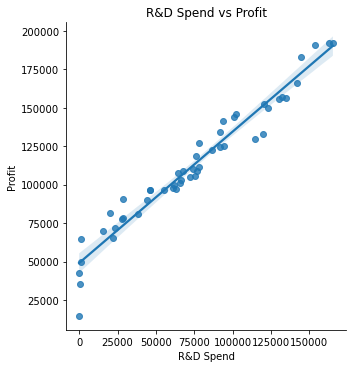

In [23]:
sns.lmplot(x='R&D Spend',y='Profit',data=startup_data)
plt.title('R&D Spend vs Profit')
plt.show()

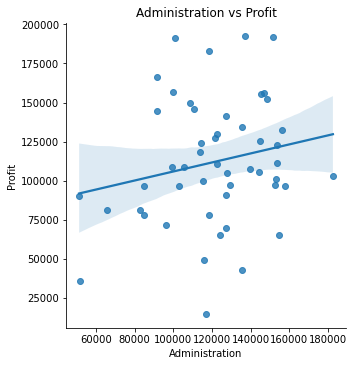

In [24]:
sns.lmplot(x='Administration',y='Profit',data=startup_data)
plt.title('Administration vs Profit')
plt.show()

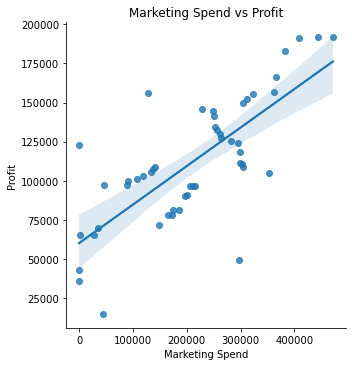

In [25]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startup_data)
plt.title('Marketing Spend vs Profit')
plt.show()

### Linearity test failed

# Multicolinearity Test using corelation matrix

In [26]:
corr_matrix = startup_data.corr().round(2)
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


<AxesSubplot:>

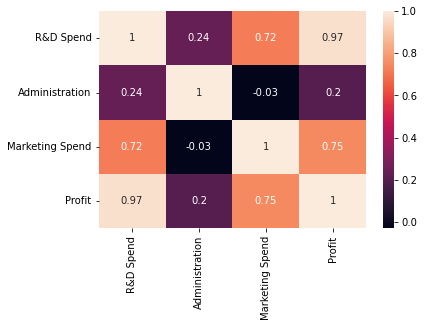

In [27]:
sns.heatmap(corr_matrix,annot=True)

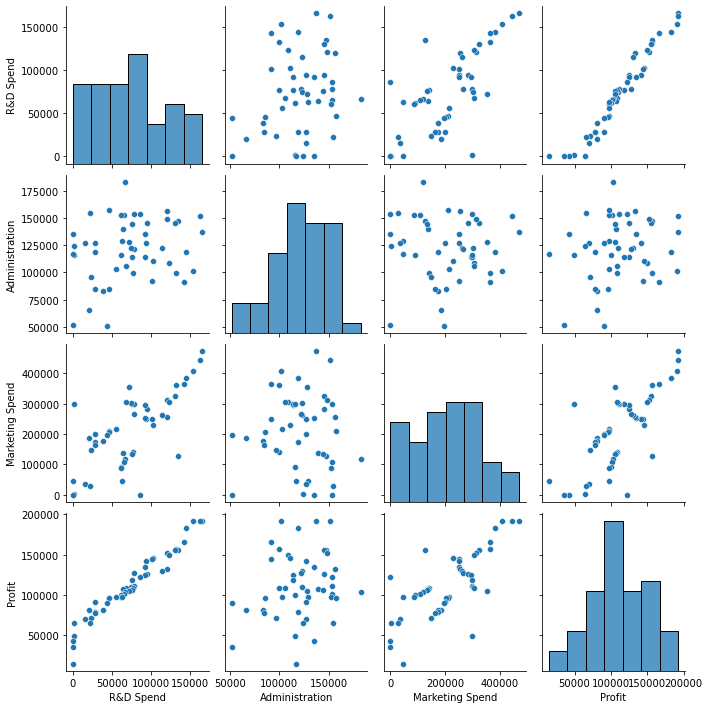

In [28]:
sns.pairplot(data=startup_data)
plt.show()

# Data preperation

In [29]:
startup_data = startup_data.rename(columns = {'R&D Spend': 'R_D_Spent' , 'Marketing Spend': 'Marketing'})
startup_data

,R_D_Spent,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
le = LabelEncoder()

In [31]:
startup_data['State'] = le.fit_transform(startup_data['State'])

In [32]:
startup_data

,R_D_Spent,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [33]:
X = startup_data.drop(['Profit'],axis= 1)
y= startup_data[['Profit']]

In [34]:
X.columns

Index(['R_D_Spent', 'Administration', 'Marketing', 'State'], dtype='object')

# Model Training

In [35]:
startup_model_1 = LinearRegression()
startup_model_1.fit(X,y)

LinearRegression()

In [36]:
startup_model_1.coef_

array([[  0.80575968,  -0.02682585,   0.02722767, -22.32057723]])

In [37]:
startup_model_1.intercept_

array([50142.50644348])

## Model Testing

In [38]:
y_pred = startup_model_1.predict(X)

In [39]:
error = y - y_pred

In [40]:
error.mean()

Profit   -1.644366e-11
dtype: float64

## Homoscedascity  Check

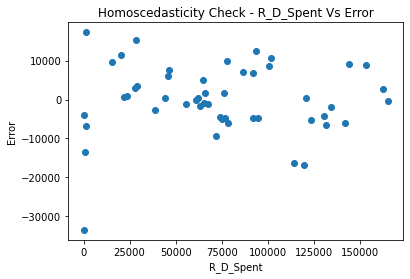

In [41]:
plt.scatter(x = startup_data['R_D_Spent'], y = error)
plt.title('Homoscedasticity Check - R_D_Spent Vs Error')
plt.xlabel('R_D_Spent')
plt.ylabel('Error')
plt.show()

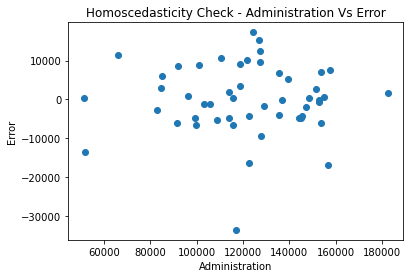

In [42]:
plt.scatter(x = startup_data['Administration'], y = error)
plt.title('Homoscedasticity Check - Administration Vs Error')
plt.xlabel('Administration')
plt.ylabel('Error')
plt.show()

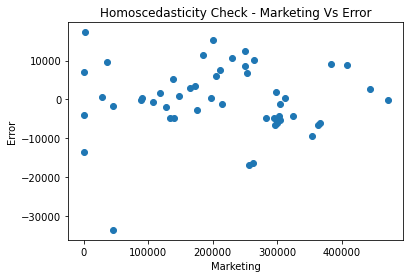

In [43]:
plt.scatter(x = startup_data['Marketing'], y = error)
plt.title('Homoscedasticity Check - Marketing Vs Error')
plt.xlabel('Marketing')
plt.ylabel('Error')
plt.show()

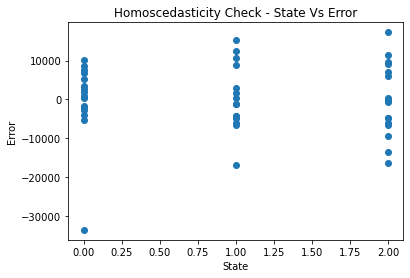

In [44]:
plt.scatter(x = startup_data['State'], y = error)
plt.title('Homoscedasticity Check - State Vs Error')
plt.xlabel('State')
plt.ylabel('Error')
plt.show()

### Homoscedascity Faiiled

### 6. Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

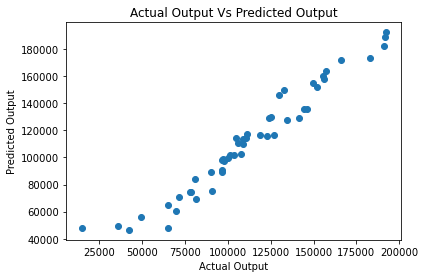

In [45]:
plt.scatter(x = y,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

#### Zero Residual Mean Test also Failed.

# Model Optimization Techniques

In [46]:
X,y

(    R_D_Spent  Administration  Marketing  State
 0   165349.20       136897.80  471784.10      2
 1   162597.70       151377.59  443898.53      0
 2   153441.51       101145.55  407934.54      1
 3   144372.41       118671.85  383199.62      2
 4   142107.34        91391.77  366168.42      1
 5   131876.90        99814.71  362861.36      2
 6   134615.46       147198.87  127716.82      0
 7   130298.13       145530.06  323876.68      1
 8   120542.52       148718.95  311613.29      2
 9   123334.88       108679.17  304981.62      0
 10  101913.08       110594.11  229160.95      1
 11  100671.96        91790.61  249744.55      0
 12   93863.75       127320.38  249839.44      1
 13   91992.39       135495.07  252664.93      0
 14  119943.24       156547.42  256512.92      1
 15  114523.61       122616.84  261776.23      2
 16   78013.11       121597.55  264346.06      0
 17   94657.16       145077.58  282574.31      2
 18   91749.16       114175.79  294919.57      1
 19   86419.70      

In [47]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [48]:
transformed_startup_data = StandardScaler()
transformed_startup_data = transformed_startup_data.fit_transform(X)
transformed_startup_data = pd.DataFrame(data=transformed_startup_data,columns=[['R_D_Spent','Administration','Marketing','State']])
transformed_startup_data

,R_D_Spent,Administration,Marketing,State
0,2.016411,0.560753,2.153943,1.212678
1,1.955860,1.082807,1.923600,-1.212678
2,1.754364,-0.728257,1.626528,0.000000
3,1.554784,-0.096365,1.422210,1.212678
4,1.504937,-1.079919,1.281528,0.000000
5,1.279800,-0.776239,1.254210,1.212678
6,1.340066,0.932147,-0.688150,-1.212678
7,1.245057,0.871980,0.932186,0.000000
8,1.030369,0.986952,0.830887,1.212678
9,1.091819,-0.456640,0.776107,-1.212678


In [49]:
X_train,X_test,y_train,y_test = train_test_split(transformed_startup_data,y,test_size=0.20,shuffle=True,random_state=None,)

In [50]:
X_train.shape,y_train.shape

((40, 4), (40, 1))

In [51]:
X_inputs = X_train.assign(Profit=y_train)
X_inputs

,R_D_Spent,Administration,Marketing,State,Profit
46,-1.593413,-0.199322,0.711122,0.000000,49490.75
40,-0.989577,-0.100900,-0.315786,-1.212678,78239.91
39,-0.773820,-1.383122,-0.297583,-1.212678,81005.76
4,1.504937,-1.079919,1.281528,0.000000,166187.94
32,-0.226949,0.283924,-1.362450,-1.212678,97427.84
36,-0.991570,0.205925,-0.081763,0.000000,90708.19
3,1.554784,-0.096365,1.422210,1.212678,182901.99
35,-0.609750,-1.308658,-0.045493,1.212678,96479.51
25,-0.199312,0.656489,-0.603517,-1.212678,107404.34
20,0.055726,-0.269588,0.723926,-1.212678,118474.03


In [52]:
model_1 = smf.ols(formula = 'Profit~R_D_Spent', data = X_inputs).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.9466
Adjusted R-square                  :  0.9452
Akaike information criterion (AIC) :  849.6169
Bayesian information criterion(BIC):  852.9947


In [56]:
model_2 = smf.ols(formula = 'Profit~R_D_Spent+Administration', data = X_inputs).fit()
print('R-square                           : ',round(model_2.rsquared,4))
print('Adjusted R-square                  : ',round(model_2.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_2.aic,4))
print('Bayesian information criterion(BIC): ',round(model_2.bic,4))

R-square                           :  0.9466
Adjusted R-square                  :  0.9438
Akaike information criterion (AIC) :  851.5966
Bayesian information criterion(BIC):  856.6632


In [57]:
model_3 = smf.ols(formula = 'Profit~R_D_Spent+Administration+Marketing', data = X_inputs).fit()
print('R-square                           : ',round(model_3.rsquared,4))
print('Adjusted R-square                  : ',round(model_3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_3.aic,4))
print('Bayesian information criterion(BIC): ',round(model_3.bic,4))

R-square                           :  0.9501
Adjusted R-square                  :  0.946
Akaike information criterion (AIC) :  850.9018
Bayesian information criterion(BIC):  857.6573


In [58]:
model_4 = smf.ols(formula = 'Profit~R_D_Spent+Administration+Marketing+State', data = X_inputs).fit()
print('R-square                           : ',round(model_4.rsquared,4))
print('Adjusted R-square                  : ',round(model_4.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_4.aic,4))
print('Bayesian information criterion(BIC): ',round(model_4.bic,4))

R-square                           :  0.9502
Adjusted R-square                  :  0.9445
Akaike information criterion (AIC) :  852.8546
Bayesian information criterion(BIC):  861.299


In [72]:
data = {'Model': ['model_1','model_2','model_3','model_4'],
        'Parameters': ['R&D Spend','R&D Spend, Administration','R&D Spend, Administration, Marketing Spend','R&D Spend, Administration, Marketing Spend ,State'],
        'R_Square': [round(model_1.rsquared,4),round(model_2.rsquared,4),round(model_3.rsquared,4) ,round(model_4.rsquared,4)],
        'Adjusted R-square': [round(model_1.rsquared_adj,4),round(model_2.rsquared_adj,4),round(model_3.rsquared_adj,4),round(model_4.rsquared_adj,4)],
        'Akaike information criterion (AIC)': [round(model_1.aic,4),round(model_2.aic,4),round(model_3.aic,4),round(model_4.aic,4)],
        'Bayesian information criterion(BIC)': [round(model_1.bic,4),round(model_2.bic,4), round(model_3.bic,4), round(model_4.bic,4)]
       }

In [73]:
df = pd.DataFrame(data)
df

,Model,Parameters,R_Square,Adjusted R-square,Akaike information criterion (AIC),Bayesian information criterion(BIC)
0,model_1,R&D Spend,0.9466,0.9452,849.6169,852.9947
1,model_2,"R&D Spend, Administration",0.9466,0.9438,851.5966,856.6632
2,model_3,"R&D Spend, Administration, Marketing Spend",0.9501,0.9460,850.9018,857.6573
3,model_4,"R&D Spend, Administration, Marketing Spend ,State",0.9502,0.9445,852.8546,861.2990


# Considering all four models we can say that Model_3 is best model seeing the R-Square, AIC and BIC Values

# Model Deployment

In [74]:
from pickle import dump

In [75]:
dump(model_3,open('model_3.pkl','wb'))

In [76]:
from pickle import load

In [77]:
loaded_model = load(open('model_3.pkl','rb'))

In [95]:
y_pred = loaded_model.predict(X_test)
y_pred

6     160099.181954
7     162858.934891
8     154706.023991
21    120622.748269
47     47861.003597
23    111163.808089
26    112703.275131
14    152617.868062
27    116796.495596
44     66916.403783
dtype: float64